In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

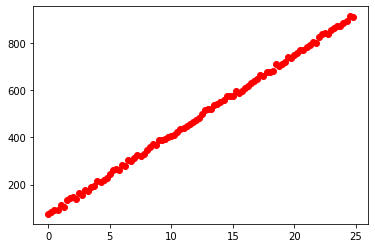

[[1.  ]
 [1.25]]


In [2]:
x=np.arange(0,25,0.25)
y=[]
for i in x:
    y.append(34*i+63+np.random.randint(0,20))
x=np.reshape(x,(100,1))
y=np.reshape(y,(100,1))
plt.plot(x,y,'ro')
plt.show()
print((np.append(1,x[5]).reshape(2,1)))

In [3]:
size=np.size(x) # size of dataset
features=np.size(x[1])
print(size,' ',features)

100   1


In [69]:
def learner(lamda, err):
    converged=False
    i=0
    theta=np.random.randn(features+1,1)
    h=lambda x: np.dot(theta.transpose(),x)
    while not converged:
        # we use lasso regression here
        loss=0
        suma=0
        for n in range(0,size):
            loss+=(h(np.append(1,x[n]).reshape(features+1,1))-y[n])**2/2
        for n in range(0,features+1):
            suma+=abs(theta[n])
        loss=loss+lamda*suma
        s=lambda rho,z: (rho-abs(lamda)) if rho>abs(lamda) else 0
        if i<size and loss>err:
            for j in range(0,features+1):
                rho=0
                z=0
                for k in range(0,size):
                    xtemp=np.append(1,x[k])
                    # print(xtemp)
                    rho+=-xtemp[j]*(h(xtemp.reshape(features+1,1))-y[k]-theta[j]*xtemp[j])
                    # print(k,j)
                    z+=xtemp[j]**2
                theta[j]=s(rho,z)/z
            print('iteration:',i+1,' loss:',loss)
            i+=1
        else:
            converged=True
            print('converged. loss:',loss)
    return theta

In [84]:
result=learner(10**(2),5)

iteration: 1  loss: [[13668684.67926105]]
iteration: 2  loss: [[2027997.71193181]]
iteration: 3  loss: [[1134752.3340115]]
iteration: 4  loss: [[637338.87512806]]
iteration: 5  loss: [[360348.74991248]]
iteration: 6  loss: [[206103.76900833]]
iteration: 7  loss: [[120210.7642826]]
iteration: 8  loss: [[72380.30511584]]
iteration: 9  loss: [[45745.39076619]]
iteration: 10  loss: [[30913.44738176]]
iteration: 11  loss: [[22654.11747849]]
iteration: 12  loss: [[18054.8192825]]
iteration: 13  loss: [[15493.64977561]]
iteration: 14  loss: [[14067.43452199]]
iteration: 15  loss: [[13273.23095828]]
iteration: 16  loss: [[12830.97001695]]
iteration: 17  loss: [[12584.69217438]]
iteration: 18  loss: [[12447.54966399]]
iteration: 19  loss: [[12371.18035704]]
iteration: 20  loss: [[12328.65327314]]
iteration: 21  loss: [[12304.97160132]]
iteration: 22  loss: [[12291.78420334]]
iteration: 23  loss: [[12284.44065653]]
iteration: 24  loss: [[12280.35132217]]
iteration: 25  loss: [[12278.0741316]]
it

[[68.55306931]
 [34.18076208]]


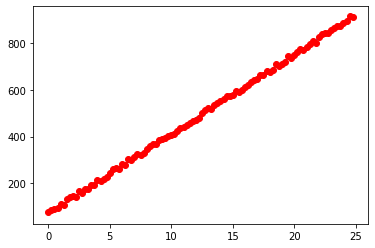

In [85]:
pred=[]
for i in range(0,size):
    pred.append(np.dot(result.transpose(),np.append(1,x[i]).reshape(features+1,1)))
print(result)
plt.plot(x,np.reshape(pred,(-1,1)))
plt.plot(x,y,'ro')
plt.show()